In [137]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

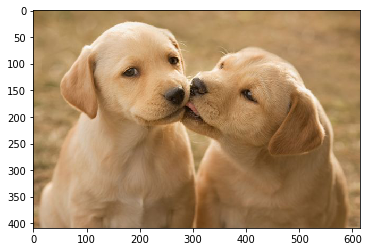

In [138]:
# read the image

image_original = mpimg.imread(r'../images/dogs.jpg')
image = image_original.copy() # else it is read only

# display original

plt.imshow(image_original, cmap='gray')

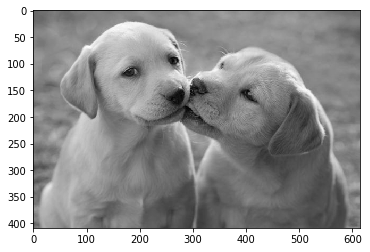

In [139]:
# converting to grayscale: avg method

R = image[:,:, 0]
G = image[:,:, 1]
B = image[:,:, 2]

grayscale = (R/3 + G/3 + B/3)

plt.imshow(grayscale, cmap='gray')

In [141]:
# input threshold from user

while(1):
    T = input('Enter the threshold')
    T = int(T)
    if T>255 or T<0:
        print('invalid threshold: re-enter')
    else:
        break


threshold = np.zeros(grayscale.shape)

for i in range(grayscale.shape[0]):
    for j in range(grayscale.shape[1]):
        if grayscale[i, j] >= T:
            threshold[i, j] = 255
        else:
            threshold[i, j] = 0
        

Enter the threshold124


Text(0.5, 1.0, 'Thresholded image')

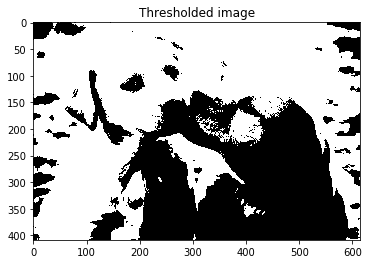

In [142]:
plt.imshow(threshold, cmap='gray')
plt.title('Thresholded image')

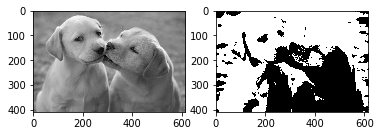

In [143]:
f, axarr = plt.subplots(1,2)
f.figsize = (400, 400)

axarr[0].imshow(grayscale, cmap='gray')

axarr[1].imshow(threshold, cmap='gray')

In [144]:
#linear piecewise contrast stretching

def get_pw_function(points):
    #points = np.array([[0, 0], [50, 40], [100, 150], [255, 255]])
    points = np.sort(points, axis=0)
    
    slopes = []
    # find slopes
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i+1]
        
        m = ( p2[1] - p1[1] ) / ( p2[0] - p1[0] )
        slopes.append(m)
        
    # find the region where ip lies and its eqivalent slope
    points_r = points[:, 0]
    
    # the function that maps input gray level to output gray level
    def pw_function(RN):
        slope_index = 0
        for i in range(len(points_r) - 1):
            r1 = points_r[i]
            r2 = points_r[i+1]

            if RN > r1 and RN <= r2:
                slope_index = i


        SN = (RN - points[slope_index][0])*slopes[slope_index] + points[slope_index][1]
        return SN
    
    # ** return the function
    return pw_function
        

In [145]:
# function to read the points in the pw map
def get_points():
    points = np.array([[0, 0], [255, 255]])
    print('Enter points: Initial points include (0,0) and (255, 255)')
    n = int(input('First: enter number of other points: '))
    print('Now start entering the points..')
    for i in range(n):
        while(1):
            print('------ point ' + str(i+1) + ' ------')
            r = int(input('r' + str(i) + ': '))
            s = int(input('s' + str(i) + ': '))
            if( r < 0 or r > 255 or s < 0 or s >255):
                print('Invalid Input: Re-enter')
                continue
            points = np.append(points, [[r, s]], axis=0)
            print('CURRENT POINTS: ')
            print(points)
            break
            
    return points
        
        

In [146]:
# get points from user and generate the function
points = get_points()
pw_func = get_pw_function(points)

Enter points: Initial points include (0,0) and (255, 255)
First: enter number of other points: 2
Now start entering the points..
------ point 1 ------
r0: 50
s0: 40
CURRENT POINTS: 
[[  0   0]
 [255 255]
 [ 50  40]]
------ point 2 ------
r1: 100
s1: 150
CURRENT POINTS: 
[[  0   0]
 [255 255]
 [ 50  40]
 [100 150]]


In [147]:
# apply the pw function to each pixel

pw_temp = np.zeros(grayscale.shape)

for i in range(grayscale.shape[0]):
    for j in range(grayscale.shape[1]):
        pw_temp[i, j] = pw_func(grayscale[i, j])

Text(0.5, 1.0, 'pw contrast stretched image')

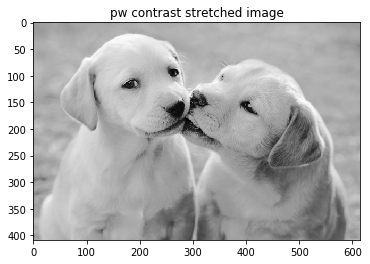

In [148]:
plt.imshow(pw_temp, cmap='gray')
plt.title('pw contrast stretched image')